In [39]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


algorithmType=SteadyStateGA
populationSize=1000
stagnancyThreshold=25
wipeoutThreshold=50
epurationDegree=0.7
epochs=-1
elitism=0
replacementNumber=100
crossover=CrossoverAverageWeighted
mutationSigma=0.05
mutationProbability=1.0
mutation=MutationGaussian
parentsNumber=2
selectionPressure=1.75
selection=SelectionLinearRanking
survival=SurvivalBestFitness

Average best fitness: 8.74473496866


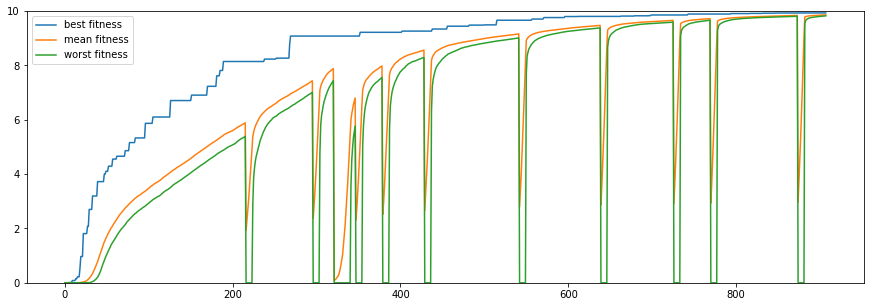

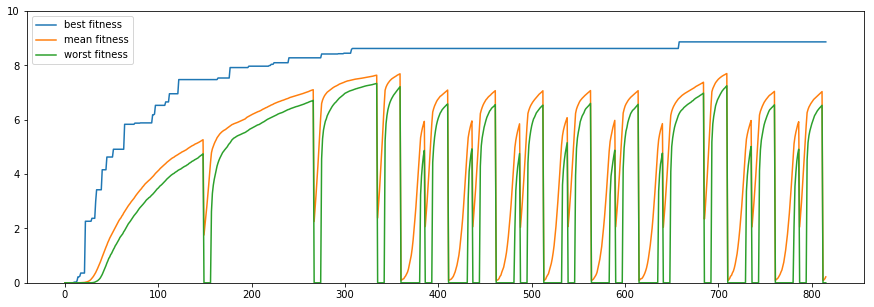

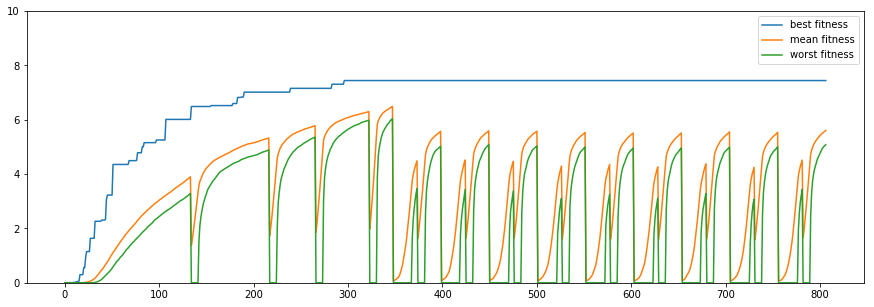

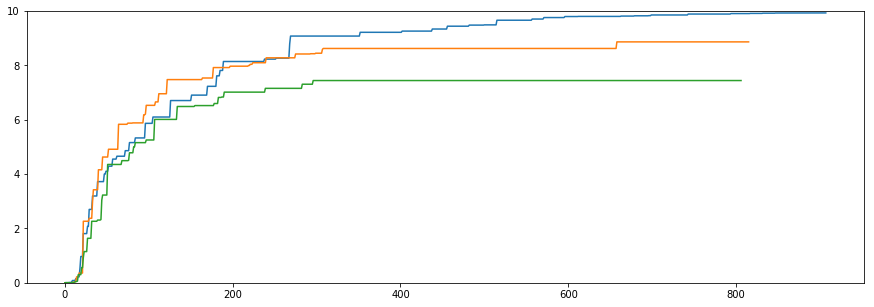

In [57]:
mean_fitness = []
best_fitness = []
worst_fitness = []

properties = False
properties_finished = False
scores = False
scores_finished = False

folders = os.listdir('logs/')

with open('logs/' + folders[-1] + '/run.log') as f:
    for line in f.readlines():
        line = line.replace('\n', '')
        if line == "Properties:":
            properties = True
        elif line == "EndProperties":
            properties = False
            properties_finished = True
        elif line == "Scores:":
            scores = True
            mean_fitness.append([])
            best_fitness.append([])
            worst_fitness.append([])
        elif line == "EndScores":
            scores = False
            scores_finished = True
        elif properties and not properties_finished:
            print line
        elif scores:
            line = line.replace(',', '').split()
            mean_fitness[-1].append(line[1])
            best_fitness[-1].append(line[2])
            worst_fitness[-1].append(line[3])

print
avg_fitness = 0
for i in range(len(mean_fitness)):
    avg_fitness = avg_fitness + float(best_fitness[i][-1])
    
print 'Average best fitness:', avg_fitness / len(best_fitness)

for i in range(len(best_fitness)):
    figure(figsize=(15, 5))
    plot(best_fitness[i], label="best fitness")
    plot(mean_fitness[i], label="mean fitness")
    plot(worst_fitness[i], label="worst fitness")
    plt.legend()
    plt.ylim(0, 10)
    
figure(figsize=(15, 5))
for i in range(len(mean_fitness)):
    plot(best_fitness[i], label="best fitness")
    plt.ylim(0, 10)